In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

image1 = cv.imread('../images/lenna_bad.png')
image2 = cv.imread('../images/winter_cat.png')
image1 = cv.cvtColor(image1, cv.COLOR_BGR2RGB)

histSize = [256]
range1 = [0, 256]

def analize(col, hist, analiz):
    print(col, hist, "min: ", np.min(analiz)," max: ", np.max(analiz))

def plot_rgb_hist(image, histSize, range1):
    for i, col in enumerate(['b', 'g', 'r']):
        analize(col, "hist1", image[:, :, i])
        hist = cv.calcHist([image], [i], None, histSize, range1)
        
        sum_hist = np.cumsum(hist[:256]) 
        hist2 = 255 * sum_hist / sum_hist[255] 
        
        image[:, :, i] = hist2[image[:, :, i]].squeeze()
        
        hist3 = cv.calcHist([image], [i], None, histSize, range1)
  
        analize(col, "hist3", image[:, :, i])
        
        plt.plot(hist, color=col)
        plt.plot(hist3, color='m', linewidth=1)
        plt.xlim(range1)
        plt.show()
        plt.clf()

    return image

b hist1 min:  100  max:  227
b hist3 min:  0  max:  255


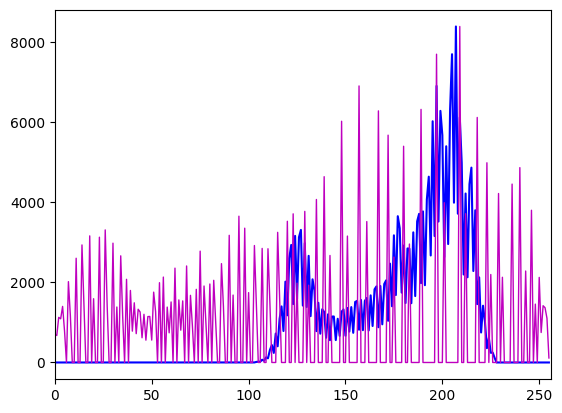

g hist1 min:  68  max:  222
g hist3 min:  0  max:  255


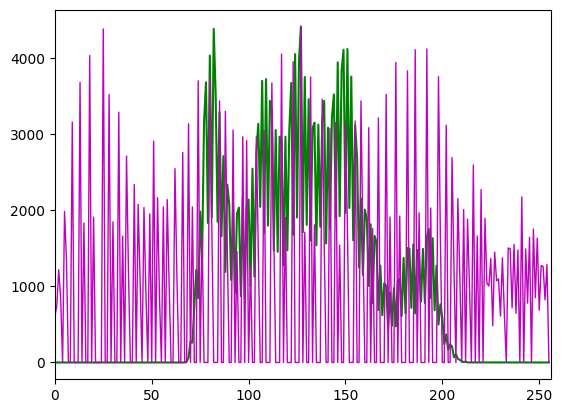

r hist1 min:  72  max:  208
r hist3 min:  0  max:  255


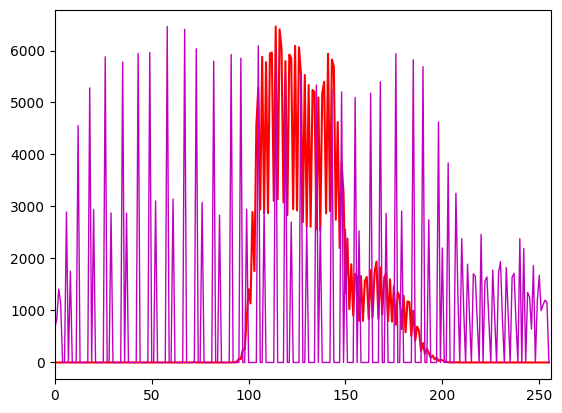

<Figure size 640x480 with 0 Axes>

In [2]:
image3 = plot_rgb_hist(image1.copy(), histSize, range1)

In [3]:
plt.imshow(image1)

In [4]:
plt.imshow(image3)